Sanity checking the CIC Emu to make sure nothing went wrong there. 

In [33]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [34]:
from pearce.emulator import NashvilleHot

In [35]:
from GPy.kern import *

In [36]:
import numpy as np
from os import path

In [37]:
training_file = '/u/ki/swmclau2/des/cic_zheng07_v3/PearceCICCosmo.hdf5'

In [38]:
em_method = 'gp'

In [39]:
fixed_params = {'z':0.0}

In [40]:
hyperparams = {'kernel': (Linear(input_dim=7, ARD=True) + RBF(input_dim=7, ARD=True)+Bias(input_dim=7),
                            RBF(input_dim=5, ARD=True)+Bias(input_dim=5) ), \
               'optimize': True}

In [41]:
df = 0.1

In [42]:
emu = NashvilleHot(training_file, fixed_params = fixed_params,\
                   downsample_factor = df, hyperparams=hyperparams)

(array([], dtype=int64), array([], dtype=int64))
0 ***************
Optimization restart 1/3, f = -19744.4952624
Optimization restart 2/3, f = -19743.2487995
Optimization restart 3/3, f = -19743.8390307
1 ***************
Optimization restart 1/3, f = -19809.7853382
Optimization restart 2/3, f = -19802.5194237
Optimization restart 3/3, f = -19809.7299895
2 ***************
Optimization restart 1/3, f = -19472.0097687
Optimization restart 2/3, f = -19472.005206
Optimization restart 3/3, f = -19472.0008816
3 ***************
Optimization restart 1/3, f = -17801.8953115
Optimization restart 2/3, f = -17800.2846211
Optimization restart 3/3, f = -17801.8597852
4 ***************
Optimization restart 1/3, f = -15744.944958
Optimization restart 2/3, f = -15745.650192
Optimization restart 3/3, f = -15745.3173747
5 ***************
Optimization restart 1/3, f = -13616.5223656
Optimization restart 2/3, f = -13629.8020804
Optimization restart 3/3, f = -13630.677901
6 ***************
Optimization restar

In [66]:
#test_file = '/home/users/swmclau2/scratch/cic_zheng07_test_v2/PearceCICCosmoTest.hdf5'
test_file = '/u/ki/swmclau2/des/cic_zheng07_v3_test/PearceCICCosmoTest.hdf5'

In [67]:
pred_y, data_y = emu.goodness_of_fit(test_file,   statistic = None)

(array([], dtype=int64), array([], dtype=int64))


In [68]:
print (np.abs(10**pred_y - 10**data_y)/(10**data_y)).mean(axis =1)

[1.15726880e-02 1.48673338e-02 1.21261671e-02 1.53968438e-02
 2.70498472e-02 3.53191289e-02 5.26211902e-02 6.12756585e-02
 1.74444277e-01 5.64671105e-01 2.19934536e+00 2.27001102e+00
 1.30380796e+01 3.45931968e+01 9.47138753e+01]


In [69]:
print (np.abs(pred_y - data_y)/np.abs(data_y)).mean(axis =1)

[0.01530528 0.00835725 0.005126   0.00480486 0.00674258 0.00730476
 0.00921099 0.00923475 0.01657026 0.02718494 0.07633933 0.08793831
 0.07771511 0.06004849 0.04352308]


In [70]:
emu._y_mean

array([-0.27771337, -0.68950851, -1.1012294 , -1.48824852, -1.84954122,
       -2.18725868, -2.50557234, -2.80957238, -3.11165192, -3.10806361,
       -5.03451044, -6.56396544, -7.57341293, -8.18721988, -8.60465501])

In [71]:
idx = 100

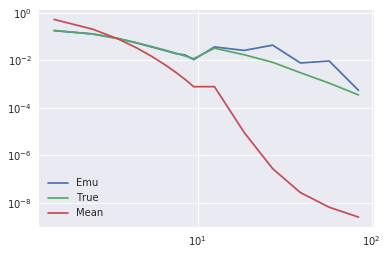

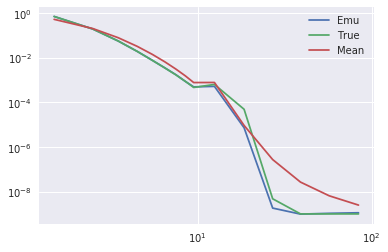

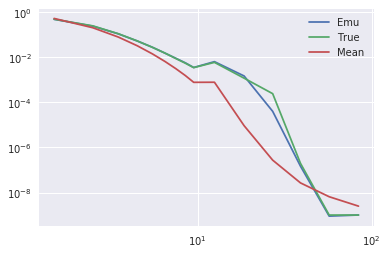

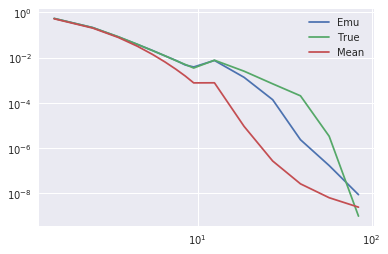

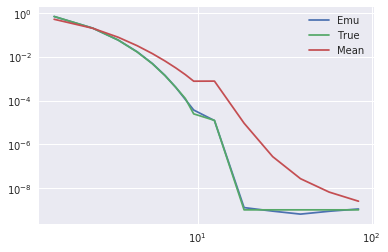

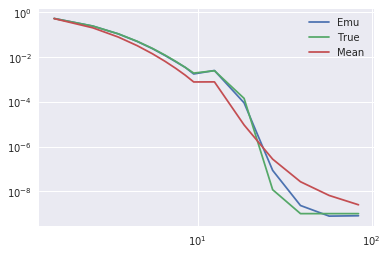

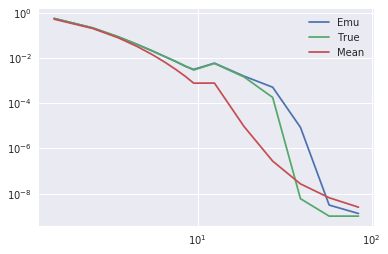

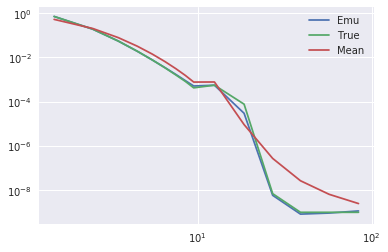

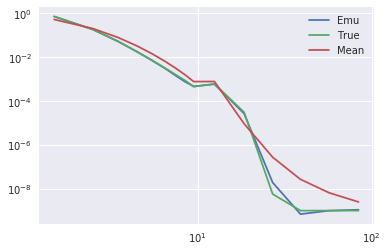

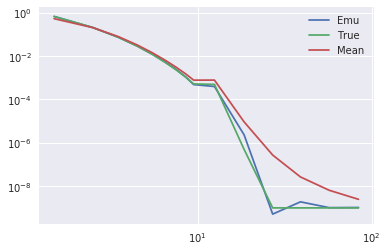

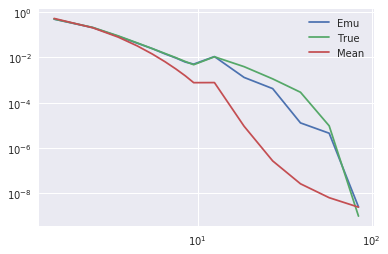

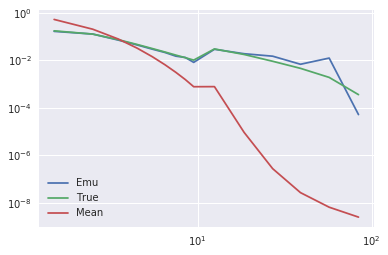

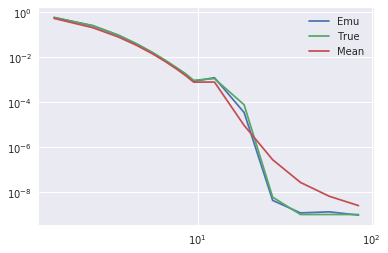

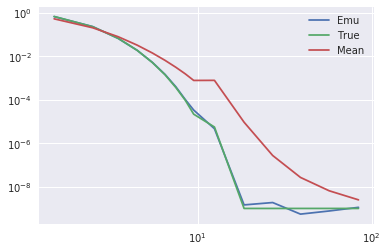

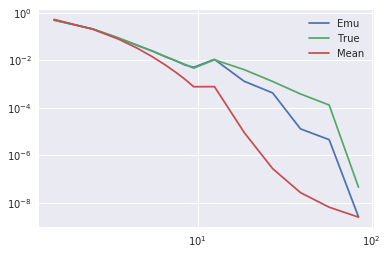

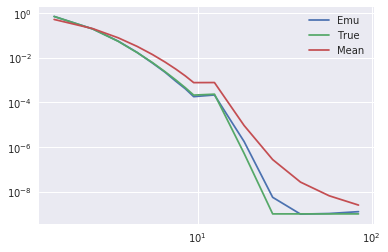

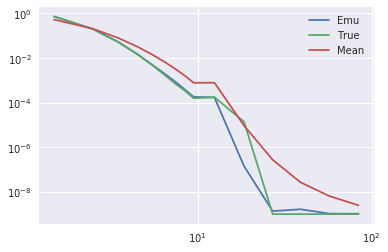

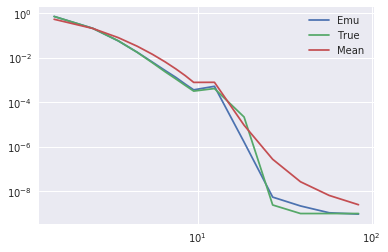

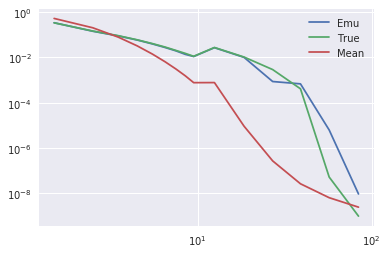

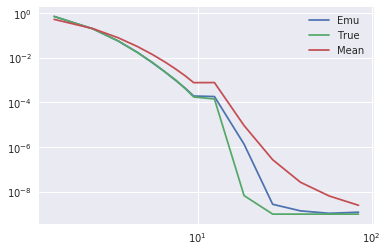

In [72]:
for idx in np.random.choice(pred_y.shape[1], 20, replace = False):
    plt.plot(emu.scale_bin_centers, 10**pred_y[:, idx], label = 'Emu')
    plt.plot(emu.scale_bin_centers, 10**data_y[:, idx], label = 'True')
    plt.plot(emu.scale_bin_centers, 10**emu._y_mean, label = 'Mean')

    #plt.yscale('log')
    plt.loglog();
    plt.legend(loc = 'best')
    plt.show();

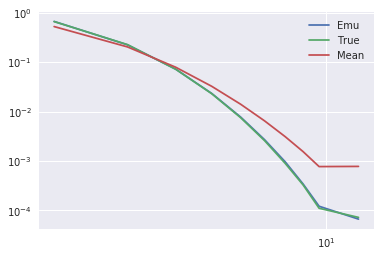

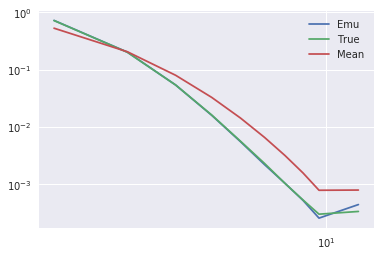

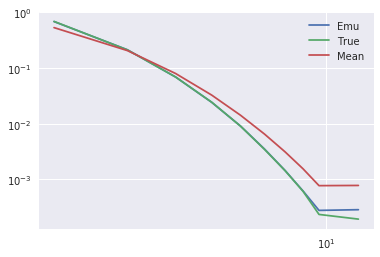

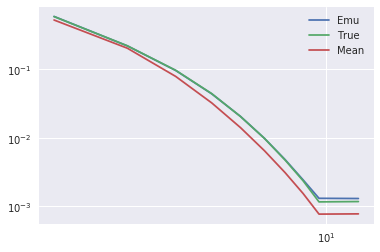

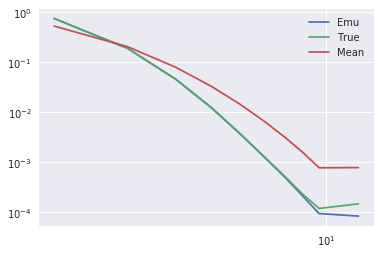

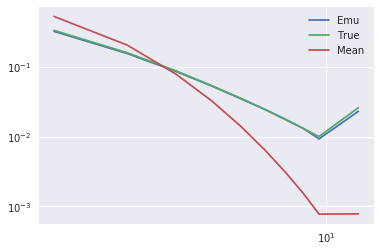

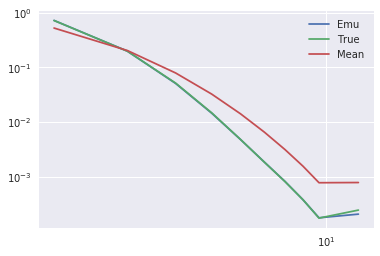

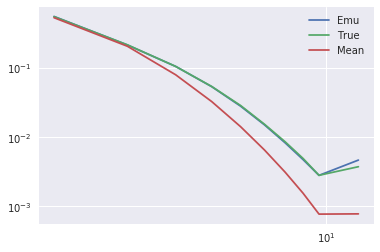

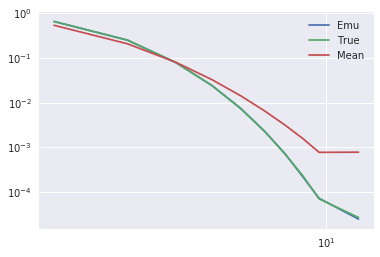

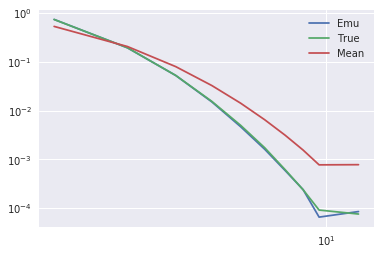

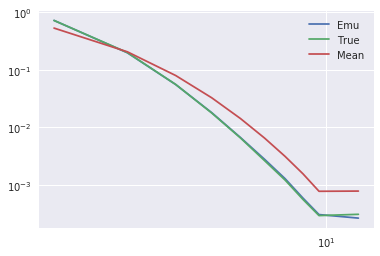

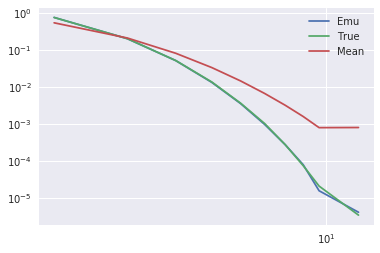

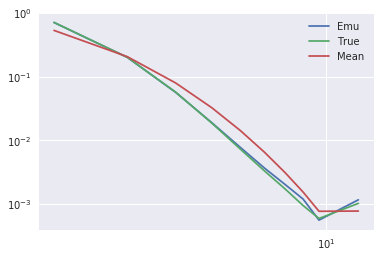

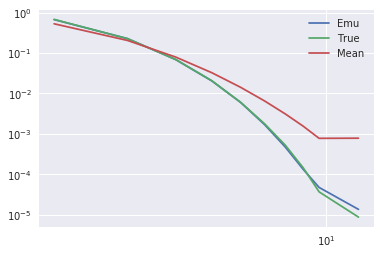

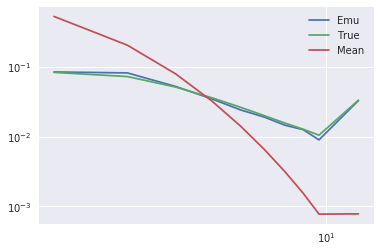

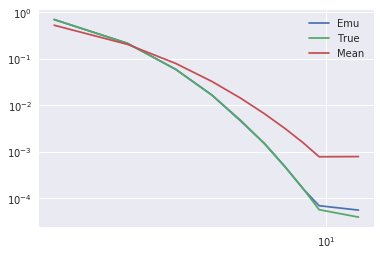

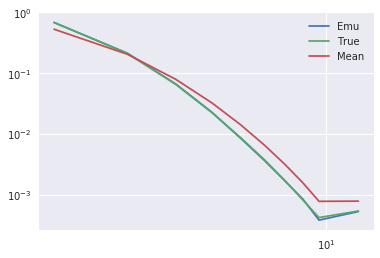

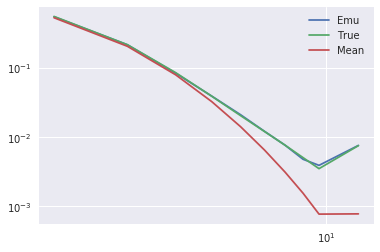

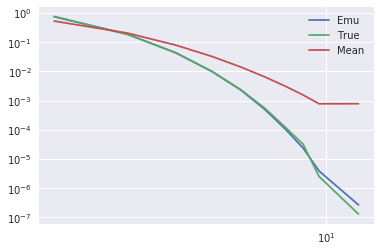

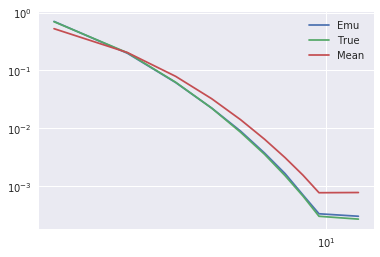

In [73]:
for idx in np.random.choice(pred_y.shape[1], 20, replace = False):
    plt.plot(emu.scale_bin_centers[:10], 10**pred_y[:10, idx], label = 'Emu')
    plt.plot(emu.scale_bin_centers[:10], 10**data_y[:10, idx], label = 'True')
    plt.plot(emu.scale_bin_centers[:10], 10**emu._y_mean[:10], label = 'Mean')

    #plt.yscale('log')
    plt.loglog();
    plt.legend(loc = 'best')
    plt.show();

In [74]:
test_mean = data_y.mean(axis = 1)
test_std = data_y.std(axis = 1)

In [75]:
data = emu.y.reshape((15, -1))

In [76]:
data = data*emu._y_std.reshape((-1, 1)) + emu._y_mean.reshape((-1,1))

In [77]:
data.shape

(15, 40000)

In [78]:
train_mean = data.mean(axis = 1 )
train_std = data.std(axis = 1)

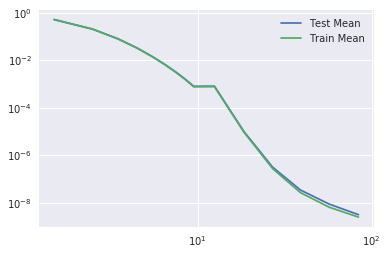

In [79]:
plt.plot(emu.scale_bin_centers, 10**test_mean, label = 'Test Mean')
plt.plot(emu.scale_bin_centers, 10**train_mean, label = 'Train Mean')

#plt.yscale('log')
plt.loglog();
plt.legend(loc = 'best')
plt.show();

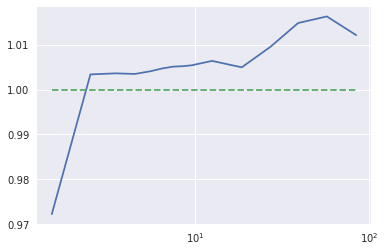

In [80]:
plt.plot(emu.scale_bin_centers, train_mean/test_mean)
plt.plot(emu.scale_bin_centers, np.ones_like(emu.scale_bin_centers), ls = '--')

plt.xscale('log')
#plt.loglog();
#plt.legend(loc = 'best')
plt.show();

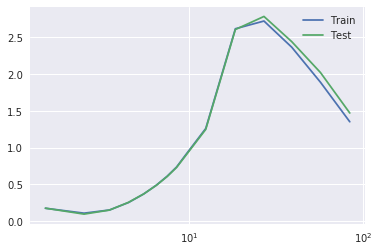

In [81]:
plt.plot(emu.scale_bin_centers, train_std, label = 'Train')
plt.plot(emu.scale_bin_centers, test_std, label = 'Test')
plt.legend(loc='best')
plt.xscale('log')
plt.show();

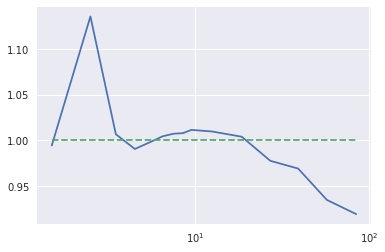

In [82]:
plt.plot(emu.scale_bin_centers, train_std/test_std)
plt.plot(emu.scale_bin_centers, np.ones_like(emu.scale_bin_centers), ls = '--')

plt.xscale('log')
#plt.loglog();
#plt.legend(loc = 'best')
plt.show();

In [83]:
emu.scale_bin_centers

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 12.5, 18.5,
       27. , 39. , 57. , 84. ])

In [84]:
import h5py
test_mean = np.zeros((15,))
with h5py.File(test_file, 'r') as f:
    for key in f.keys():
        test_mean+=f[key]['a_1.000']['obs'][()].mean(axis = 0)
        
test_mean/=35

In [85]:
import h5py
train_mean = np.zeros((15,))
with h5py.File(training_file, 'r') as f:
    for key in f.keys():
        train_mean+=f[key]['a_1.000']['obs'][()].mean(axis = 0)
        
train_mean/=40

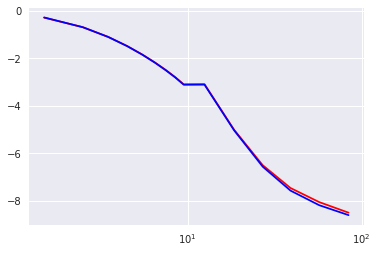

In [86]:
plt.plot(emu.scale_bin_centers, test_mean, color = 'r')
plt.plot(emu.scale_bin_centers, train_mean, color = 'b')
plt.xscale('log')

In [87]:
train_mean

array([-0.27771337, -0.68950851, -1.1012294 , -1.48824852, -1.84954122,
       -2.18725868, -2.50557234, -2.80957238, -3.11165192, -3.10806361,
       -5.03451044, -6.56396544, -7.57341293, -8.18721988, -8.60465501])